In [29]:
#import packages
import pandas as pd
import datetime as dt
import numpy as np

import os


In [30]:
#missing datas / map empty cells
#=> terminal : pip install missingno
import missingno as mno


In [31]:
#import file and first infos
list_clics = pd.read_excel("C:/Users/BGE/ownCloud/Arnaud/DEVELOPPEMENT/ACTIVITE/Sponso owncloud perso AS/Conventions et suivi activité/SUIVI CLICS/BIG QUERY/export_mises_en_relation_2021_to_2024_01_31.xlsx")
list_clics.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21656 entries, 0 to 21655
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Entrepreneur           21656 non-null  object
 1   Email                  21656 non-null  object
 2   Telephone              21623 non-null  object
 3   Partenaire             21656 non-null  object
 4   Catégorie partenaire   21656 non-null  object
 5   Conseiller             21656 non-null  object
 6   Antenne                21656 non-null  object
 7   BGE Club               21656 non-null  object
 8   Contact partenaire     21639 non-null  object
 9   Date mise en relation  21656 non-null  object
 10  A été contacté         21656 non-null  object
 11  A eu un échange        21656 non-null  object
 12  Note                   21656 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


In [32]:
# discover structure of dataframe
list_clics.head()


,Entrepreneur,Email,Telephone,Partenaire,Catégorie partenaire,Conseiller,Antenne,BGE Club,Contact partenaire,Date mise en relation,A été contacté,A eu un échange,Note
0,Yvette BEUTIN,yvette.beutin@orange.fr,0631957965,Allianz Audomarois,4 - Assurance,Amandine DELANNOYE,Saint-Omer,NON,Olivier.doret@allianz.fr,2024-01-31 17:17,-,-,-
1,Yvette BEUTIN,yvette.beutin@orange.fr,0631957965,SAGEX FLANDRE,2- Comptabilité,Amandine DELANNOYE,Saint-Omer,NON,sabine.charlet@sagexflandre.com,2024-01-31 17:14,-,-,-
2,Stéphane NOENS,stephane62500@hotmail.fr,0781827932,Allianz Audomarois,4 - Assurance,Amandine DELANNOYE,Saint-Omer,NON,Olivier.doret@allianz.fr,2024-01-31 16:20,-,-,-
3,Candice KARPINSKI,candice.karpinski@orange.fr,0647763639,Cabinet MdH Avocats,7 - Juridique - RH,Blandine LIOTARD,Villeneuve d Ascq,OUI,gdhumieres.avocat@gmail.com,2024-01-31 16:14,-,-,-
4,Karim BOUSSIGA,boussigakarim@gmail.com,0632071226,Lamie Mutuelle,5- Mutuelle & prévoyance,Francois HOT,Lens,NON,Contact-entreprise@lamie-mutuelle.fr,2024-01-31 15:53,-,-,-


In [33]:
#nb of lines
list_clics.count

<bound method DataFrame.count of                 Entrepreneur                                 Email  \
0              Yvette BEUTIN               yvette.beutin@orange.fr   
1              Yvette BEUTIN               yvette.beutin@orange.fr   
2             Stéphane NOENS              stephane62500@hotmail.fr   
3          Candice KARPINSKI           candice.karpinski@orange.fr   
4             Karim BOUSSIGA               boussigakarim@gmail.com   
...                      ...                                   ...   
21651          PIERRE DEBREU                    pdebreu@hotmail.fr   
21652          PIERRE DEBREU                    pdebreu@hotmail.fr   
21653          PIERRE DEBREU                    pdebreu@hotmail.fr   
21654          Magali DUBOIS                   maghair62@gmail.com   
21655  Antonio PEREIRA.TESTS  a.pereira.tests@bge-hautsdefrance.fr   

        Telephone                                         Partenaire  \
0      0631957965                                 Alli

In [34]:
# column structures
list_clics.columns

Index(['Entrepreneur', 'Email', 'Telephone', 'Partenaire',
       'Catégorie partenaire', 'Conseiller', 'Antenne', 'BGE Club',
       'Contact partenaire', 'Date mise en relation', 'A été contacté',
       'A eu un échange', 'Note'],
      dtype='object')

In [35]:
# duplicates
list_unduplicated = list_clics.drop_duplicates()
list_unduplicated.count()

Entrepreneur             21643
Email                    21643
Telephone                21610
Partenaire               21643
Catégorie partenaire     21643
Conseiller               21643
Antenne                  21643
BGE Club                 21643
Contact partenaire       21626
Date mise en relation    21643
A été contacté           21643
A eu un échange          21643
Note                     21643
dtype: int64

In [36]:
#truncate without hours + datetime format
#Date_rel_dt = pd.to_datetime(list_unduplicated['Date mise en relation'])
#Date_rel_dt.dt.date

list_unduplicated = list_unduplicated.assign(date_without_time = lambda x: pd.to_datetime(x['Date mise en relation']).dt.date)
type(list_unduplicated)


pandas.core.frame.DataFrame

In [37]:
list_unduplicated.head()

,Entrepreneur,Email,Telephone,Partenaire,Catégorie partenaire,Conseiller,Antenne,BGE Club,Contact partenaire,Date mise en relation,A été contacté,A eu un échange,Note,date_without_time
0,Yvette BEUTIN,yvette.beutin@orange.fr,0631957965,Allianz Audomarois,4 - Assurance,Amandine DELANNOYE,Saint-Omer,NON,Olivier.doret@allianz.fr,2024-01-31 17:17,-,-,-,2024-01-31
1,Yvette BEUTIN,yvette.beutin@orange.fr,0631957965,SAGEX FLANDRE,2- Comptabilité,Amandine DELANNOYE,Saint-Omer,NON,sabine.charlet@sagexflandre.com,2024-01-31 17:14,-,-,-,2024-01-31
2,Stéphane NOENS,stephane62500@hotmail.fr,0781827932,Allianz Audomarois,4 - Assurance,Amandine DELANNOYE,Saint-Omer,NON,Olivier.doret@allianz.fr,2024-01-31 16:20,-,-,-,2024-01-31
3,Candice KARPINSKI,candice.karpinski@orange.fr,0647763639,Cabinet MdH Avocats,7 - Juridique - RH,Blandine LIOTARD,Villeneuve d Ascq,OUI,gdhumieres.avocat@gmail.com,2024-01-31 16:14,-,-,-,2024-01-31
4,Karim BOUSSIGA,boussigakarim@gmail.com,0632071226,Lamie Mutuelle,5- Mutuelle & prévoyance,Francois HOT,Lens,NON,Contact-entreprise@lamie-mutuelle.fr,2024-01-31 15:53,-,-,-,2024-01-31


<Axes: >

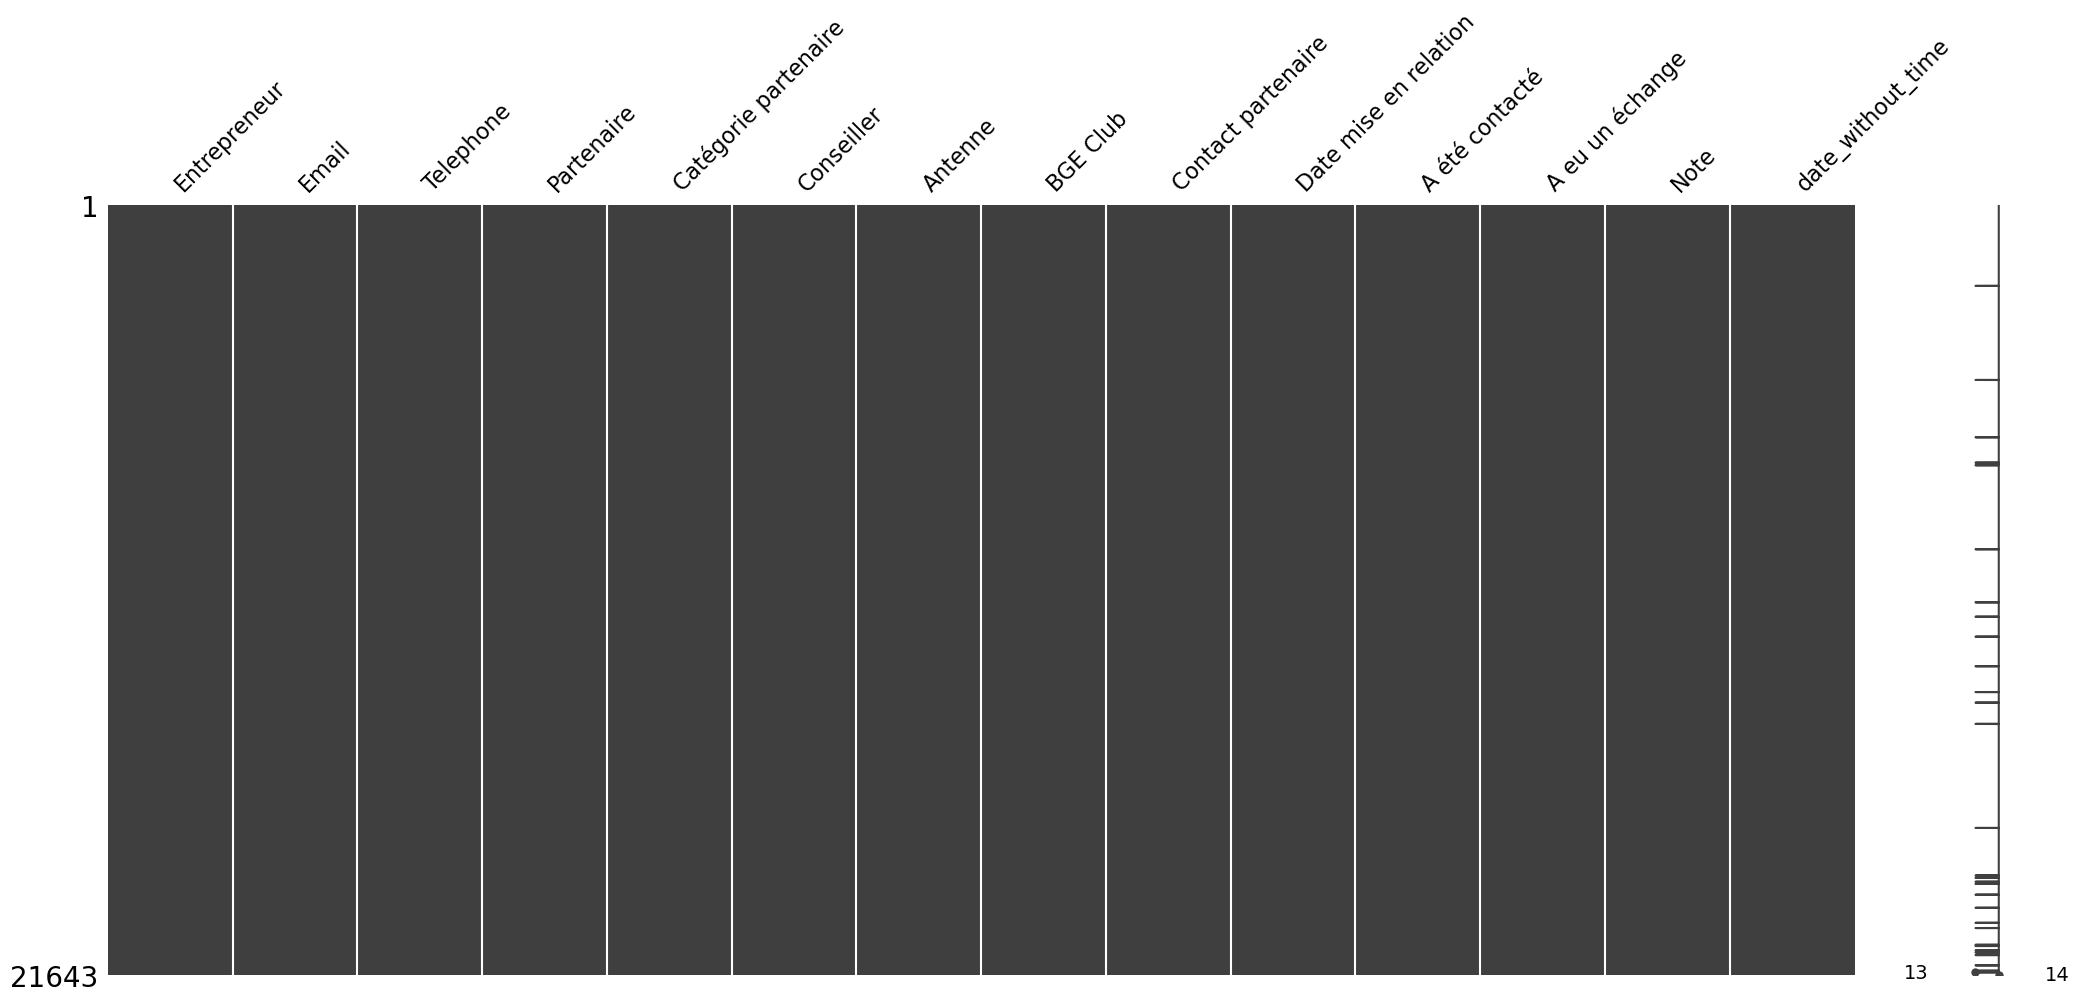

In [38]:
#map empty/na cells
mno.matrix(list_unduplicated)

In [39]:
#check if any null data
list_unduplicated.isnull().sum()


Entrepreneur              0
Email                     0
Telephone                33
Partenaire                0
Catégorie partenaire      0
Conseiller                0
Antenne                   0
BGE Club                  0
Contact partenaire       17
Date mise en relation     0
A été contacté            0
A eu un échange           0
Note                      0
date_without_time         0
dtype: int64

In [40]:
#create partners table
df_partners = list_unduplicated[~list_unduplicated.duplicated(subset=['Partenaire'])].copy()
df_partners = df_partners[ ['Partenaire', 'Contact partenaire']]
df_partners['Partenaire'].str.strip()
df_partners.sort_values(by='Partenaire')
#df_partners['Partenaire'] = pd.Series(df_partners['Partenaire'])

#create index
erase_space = lambda x : x.replace(' ', '')
strip_index = lambda x : x.str.strip()
# df_partners['idPartners'] = df_partners['Partenaire'].apply(erase_space, strip_index)
df_partners.sort_values(by='Partenaire', inplace=True)

df_partners.loc[(df_partners['Partenaire'].str.contains('Groupama'))]
#df_partners[groupama]

,Partenaire,Contact partenaire
79,Groupama Assurances - Cambrai,romain.vidal@ne-groupama.fr
90,Groupama Assurances - Denain,rfievet@groupama-ne.fr
10,Groupama Lens,jonathan.halupka@ne-groupama.fr
44,Groupama Roubaix,paparis@groupama-ne.fr


In [41]:
#create partners table
list_unduplicated.sort_values(by='Date mise en relation')
df_partners = list_unduplicated.groupby(['Partenaire']).first()

df_partners.values

array([['Ange LETURCQ', 'LETURCQ.A62@GMAIL.COM', '0608987653', ..., '-',
        '-', datetime.date(2023, 6, 9)],
       ['Remi PENIN', 'peninremi@gmail.com', '0640321545', ..., '-', '-',
        datetime.date(2021, 11, 26)],
       ['Anass CHERQAOUI', 'ANASS.CHQ@GMAIL.COM', '0670550954', ..., '-',
        '-', datetime.date(2023, 12, 18)],
       ...,
       ['Ines BRASSART', 'brassartines@icloud.com', '0761268343', ...,
        '-', '-', datetime.date(2024, 1, 29)],
       ['Juliette DURIEZ', 'juliettederen@yahoo.fr', '0699173530', ...,
        '-', '-', datetime.date(2024, 1, 30)],
       ['Marc GODARD', 'marc.godard.phd@gmail.com', '0698174635', ...,
        '-', '-', datetime.date(2024, 1, 16)]], dtype=object)

In [42]:
#replace empty cells
#def str_or_not(x):
    #if x == '':
        #if isinstance(x, str):
        #x.replace('', np.nan)
    #"else: x

#list_unduplicated_unblanked = list_unduplicated.apply(lambda x: x.str.strip().replace('', np.nan))
list_unduplicated_unblanked = list_unduplicated.replace('', np.nan)
#mno.matrix(list_unduplicated_unblanked)

#list_unduplicated_unblanked.isnull().sum()
list_unduplicated_unblanked.isna().sum()
# type(list_unduplicated_unblanked)



Entrepreneur              0
Email                     0
Telephone                33
Partenaire                0
Catégorie partenaire      0
Conseiller                0
Antenne                   0
BGE Club                  0
Contact partenaire       17
Date mise en relation     0
A été contacté            0
A eu un échange           0
Note                      0
date_without_time         0
dtype: int64

In [43]:
#fillna blank cells
list_unduplicated_unblanked['Contact partenaire'].fillna('inconnu@adfinir.com', inplace=True)
list_unduplicated_unblanked['Telephone'].fillna('0600000000', inplace=True)
list_unduplicated_unblanked.isna().sum()



Entrepreneur             0
Email                    0
Telephone                0
Partenaire               0
Catégorie partenaire     0
Conseiller               0
Antenne                  0
BGE Club                 0
Contact partenaire       0
Date mise en relation    0
A été contacté           0
A eu un échange          0
Note                     0
date_without_time        0
dtype: int64

In [44]:
list_unduplicated_unblanked.head()

,Entrepreneur,Email,Telephone,Partenaire,Catégorie partenaire,Conseiller,Antenne,BGE Club,Contact partenaire,Date mise en relation,A été contacté,A eu un échange,Note,date_without_time
0,Yvette BEUTIN,yvette.beutin@orange.fr,0631957965,Allianz Audomarois,4 - Assurance,Amandine DELANNOYE,Saint-Omer,NON,Olivier.doret@allianz.fr,2024-01-31 17:17,-,-,-,2024-01-31
1,Yvette BEUTIN,yvette.beutin@orange.fr,0631957965,SAGEX FLANDRE,2- Comptabilité,Amandine DELANNOYE,Saint-Omer,NON,sabine.charlet@sagexflandre.com,2024-01-31 17:14,-,-,-,2024-01-31
2,Stéphane NOENS,stephane62500@hotmail.fr,0781827932,Allianz Audomarois,4 - Assurance,Amandine DELANNOYE,Saint-Omer,NON,Olivier.doret@allianz.fr,2024-01-31 16:20,-,-,-,2024-01-31
3,Candice KARPINSKI,candice.karpinski@orange.fr,0647763639,Cabinet MdH Avocats,7 - Juridique - RH,Blandine LIOTARD,Villeneuve d Ascq,OUI,gdhumieres.avocat@gmail.com,2024-01-31 16:14,-,-,-,2024-01-31
4,Karim BOUSSIGA,boussigakarim@gmail.com,0632071226,Lamie Mutuelle,5- Mutuelle & prévoyance,Francois HOT,Lens,NON,Contact-entreprise@lamie-mutuelle.fr,2024-01-31 15:53,-,-,-,2024-01-31


In [45]:
list_unduplicated_unblanked.duplicated(subset=['Entrepreneur', 'Email', 'Telephone', 'Partenaire', 'Catégorie partenaire', 'Conseiller','Antenne', 'Date mise en relation', 'date_without_time']).sum()

0

In [46]:
#erase useless columns
list_cleaned = list_unduplicated_unblanked.drop(columns=['Telephone', 'BGE Club', 'Contact partenaire', 'Date mise en relation', 'A été contacté', 'A eu un échange', 'Note'] )
list_cleaned

,Entrepreneur,Email,Partenaire,Catégorie partenaire,Conseiller,Antenne,date_without_time
0,Yvette BEUTIN,yvette.beutin@orange.fr,Allianz Audomarois,4 - Assurance,Amandine DELANNOYE,Saint-Omer,2024-01-31
1,Yvette BEUTIN,yvette.beutin@orange.fr,SAGEX FLANDRE,2- Comptabilité,Amandine DELANNOYE,Saint-Omer,2024-01-31
2,Stéphane NOENS,stephane62500@hotmail.fr,Allianz Audomarois,4 - Assurance,Amandine DELANNOYE,Saint-Omer,2024-01-31
3,Candice KARPINSKI,candice.karpinski@orange.fr,Cabinet MdH Avocats,7 - Juridique - RH,Blandine LIOTARD,Villeneuve d Ascq,2024-01-31
4,Karim BOUSSIGA,boussigakarim@gmail.com,Lamie Mutuelle,5- Mutuelle & prévoyance,Francois HOT,Lens,2024-01-31
...,...,...,...,...,...,...,...
21651,PIERRE DEBREU,pdebreu@hotmail.fr,Axa Prévoyance et Patrimoine,5- Mutuelle & prévoyance,Pierre LALOYAUX,Lambersart,2021-11-17
21652,PIERRE DEBREU,pdebreu@hotmail.fr,Abeille Assurance Lille Nationale - Agence Ve...,4 - Assurance,Pierre LALOYAUX,Lambersart,2021-11-17
21653,PIERRE DEBREU,pdebreu@hotmail.fr,AESIO Cambrai,5- Mutuelle & prévoyance,Pierre LALOYAUX,Lambersart,2021-11-17
21654,Magali DUBOIS,maghair62@gmail.com,TERRE D'ENTREPRENEURS,2- Comptabilité,Amandine DELANNOYE,Béthune,2021-11-17


In [47]:
#create a csv file
list_cleaned.to_csv('list_cleaned_01_31', index=False)